<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

C:\Users\wubid\solar-challenge-week0\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Number of outliers: 7740


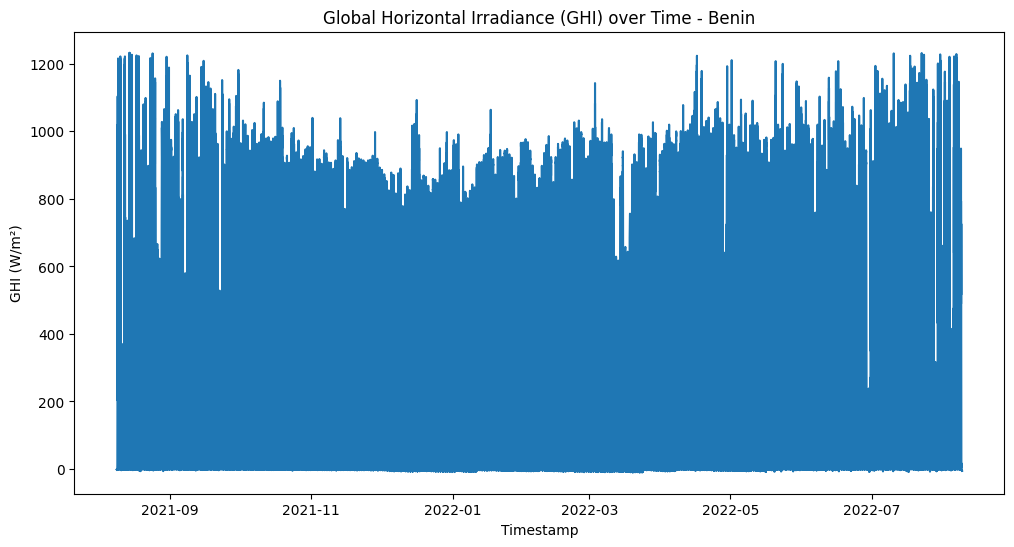

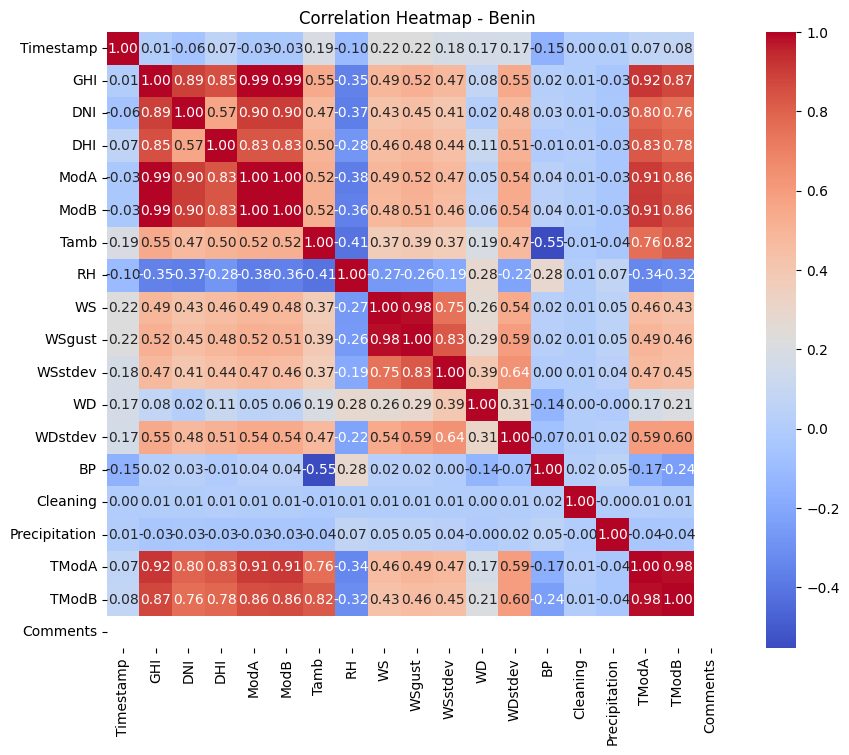

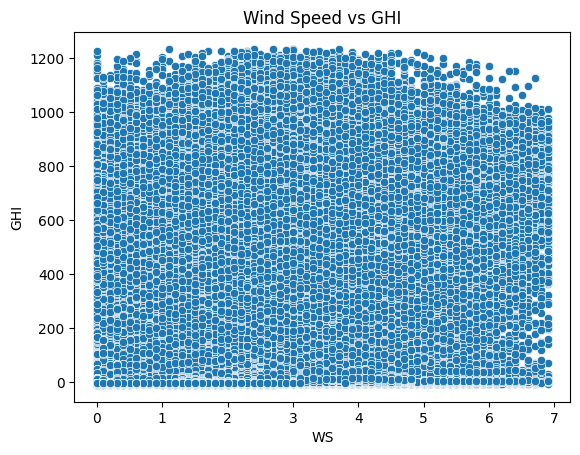

In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/benin.csv')

# View the first 5 rows
df.head()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.info()
# Summary stats for all numeric columns
df.describe()

# Count missing values
df.isna().sum()

# List columns with >5% null values
missing_percent = df.isna().mean() * 100
missing_percent[missing_percent > 5]
# Fill missing numeric values with median (common approach)
for col in numeric_cols:
    median_value = df[col].median()
    if pd.notna(median_value):  # only fill if median exists
        df[col] = df[col].fillna(median_value)
from scipy import stats
import numpy as np

# Select columns to check
cols_to_check = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[cols_to_check]))

# Flag rows where any Z-score > 3
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

# Optionally remove them
df_clean = df[~outliers]
import matplotlib.pyplot as plt
import seaborn as sns

# Plot GHI over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_clean, x='Timestamp', y='GHI')
plt.title('Global Horizontal Irradiance (GHI) over Time - Benin')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.show()

# Group by Cleaning flag
df_clean.groupby('Cleaning')[['ModA','ModB']].mean()
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - Benin')
plt.show()

# Scatter plot example: WS vs GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title('Wind Speed vs GHI')
plt.show()
df_clean.to_csv('../data/benin_clean.csv', index=False)

